

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*


------

# Objective 

We are going to run a few experiments today

- Train a model with and without normalized data and investigate the weight values and learning outcomes
- Train a model with varying values for batch_size, learning_rate, and optimizers

We are essentially running mannual gridsearches on our models. In module 3, we'll learn a few different ways to automate gridseach for deep learning. 

In [1]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU, Input
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam, SGD, Adamax, Adagrad, Adadelta
from keras.activations import relu
from tensorflow.keras.callbacks import TensorBoard

In [2]:
%matplotlib inline
%load_ext tensorboard

### Load data

- Don't normalize your data just yet!

In [3]:
def load_quickdraw10():
    """
    Fill out this doc string, and comment the code, for practice in writing the kind of code that will get you hired. 
    """
    
    URL_ = "https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true"
    
    path_to_zip = tf.keras.utils.get_file('./quickdraw10.npz', origin=URL_, extract=False)

    data = np.load(path_to_zip)

    X = data['arr_0']
    Y = data['arr_1']
        
    return train_test_split(X, Y, shuffle=True)

In [4]:
X_train, X_test, y_train, y_test = load_quickdraw10()

In [5]:
n_labels = len(np.unique(y_train))

----
### Write a Model Function
- Write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. 

Your function `create_model` should accept the following parameters

- Learning Rate `lr`
- Optimizer `opt`


Build a model with the following architecture and parameter values

- Use `1 hidden layer` 
- Use `sigmoid` activation function in hidden layer
- Use `250 nodes` in hidden layer 
- Use `10 nodes` in output layer
- Use `softmax` activation fucntion in output layer
- Use `sparse_categorical_crossentropy` loss function
- Use `accuracy` as your metric 

We will use this function to build all the models that we'll need to run our experiments. 

In [6]:
def create_model(lr=.01, opt="adam"):
    """
    
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        Valid options are "adam", "sgd", "adamax", "adagrad", "adadelta" 
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """
    optimizers = {'adam':Adam, 'sgd':SGD, 'adamax':Adamax, 'adagrad':Adagrad, 'adadelta':Adadelta}
    
    # Instantiate optimizer specified by opt 
    # If opt is not one of the valid options, defaults to Adam
    opt = optimizers.get(opt,Adam)(learning_rate=lr)
    

    # build model here
# YOUR CODE HERE
    model = Sequential([
    Dense(250, input_dim=784, activation='sigmoid'),
    Dense(10, activation='softmax')
  ])
    model.compile(optimizer=opt, 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model


In [7]:
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)
# a check on model architecture
model = create_model()

pp.pprint(model.layers)
pp.pprint(model.get_config()['layers'])

n_layers = len(model.get_config()["layers"])
output_act_funct =  model.get_config()["layers"][-1]["config"]["activation"]
print(n_layers, output_act_funct)

assert n_layers == 3, "You should have an input, one hidden, and an output layer"
assert output_act_funct == "softmax", "Output act funct should be softmax"

[   <tensorflow.python.keras.layers.core.Dense object at 0x7fbe52a5db00>,
[   {   'class_name': 'InputLayer',
        'config': {   'batch_input_shape': (None, 784),
                      'dtype': 'float32',
                      'name': 'dense_input',
                      'ragged': False,
                      'sparse': False}},
    {   'class_name': 'Dense',
        'config': {   'activation': 'sigmoid',
                      'activity_regularizer': None,
                      'batch_input_shape': (None, 784),
                      'bias_constraint': None,
                      'bias_initializer': {'class_name': 'Zeros', 'config': {}},
                      'bias_regularizer': None,
                      'dtype': 'float32',
                      'kernel_constraint': None,
                      'kernel_initializer': {   'class_name': 'GlorotUniform',
                                                'config': {'seed': None}},
                      'kernel_regularizer': None,
          

------

# Experiment #1: How does normalized input data affect our model's learning outcome?

In this experiment we are going to answer the above question by training identifical models on a normalized data set and on a non-normalized data set. 

Then we will 

- Analyze the trained weight values of our model 
- Plot

In [8]:
# Clear any logs from previous runs
!rm -rf ./logs/

### Fit Model on Non-Normalized data

In [9]:
# fit model on non-normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

model = create_model(lr=.001, opt="adam")

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=0, 
          callbacks=[tensorboard])

---------

### Fit Model on Normalized data

In [10]:
# Normalize your training and test sets 
# save normalized data to X_train_scaled and X_test_scaled

# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#print(X_train[0], X_train_scaled[0], X_test[0], X_test_scaled[0])

In [11]:
# train model on normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

norm_model = create_model(lr=.001, opt="adam")

norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=0, 
          callbacks=[tensorboard])

### Each layer is labeled

Take note of the label for each layer in the network. It is these labels that will help you identify the corresponding bias and weight distribtuions on tensorboard. 

Assuming that you've ran `create_model` 3 times: once for the model check, once to create `model`, and once to create `norm_model`:

The name of the layers for `model` should be 
- dense_2
- dense_3

The name of the layers for `norm_model` should be 
- dense_4
- dense_5


If you keep retraining one or both of these models, tensorflow will increment the integer used in the layer names.  But that doesn't really matter, just take notice of the layer names so you can find their corresponding bias and weight distribtuions in tensorboard.

**Protip:** If you want to reset the integer incrementation that tensorflow uses, you'll need to restart your notebook's kernal. 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [13]:
norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


### Tensorboard 

- Run the cell below to launch tensorboard 
- Click on the `SCALARS` tab to see plots that compare the loss and accuracy between the two models
- Cick on the `HISTOGRAMS` tab to see the distribution of the learned weights 

In [14]:
%tensorboard --logdir logs --port=8001 --host=localhost

### Tensorboard 

Check out the loss and accuracy plots on the `SCALARS` tab. 

What you should see is that the accuracy is much higher for the model that was given normalized data; conversely, the loss is much lower for the model that was given normalized data. 

Recall that what we are doing whenever training a model is adjusting the value of the bias and weights in each layer. For simplicity of analysis, we only trained two layers: a hidden layer and the output layer. 

Now click on the `HISTOGRAM` tab. 

You should see both of your model's layer names. 

### Hidden Layer Distributions

Collapse the charts that correspond to the output layer so only the distributions for the weights and bias in the hidden layer are showing. (i.e. Only expand `dense_2` and `dense_4`). 

Also don't be confused by the word `kernel`, that's just the word that Tensorflow uses instead of weights. So, to be clear, **the kernal distributions are the weight values.** 

The `bias` distributions are the bias values. 

You should see 10 distributions stacked next to each other, **one distribution per epoch.**

The distribuion in the far back corresponds to the weight values at epoch 1 (tensorflow starts the count at 0, like the index for a list). The distribution at the very front corresponds to the weight values at the 10th epoch (tensorflow indexing show 9 instead of 10).

Notice how the shape of the distribution changes accross epochs? That's because their **values are being updated via Gradient Descent.** 

The distributions that you see are direclty responsible for the validation accuracy of our models. The reason why they look different between the two models is because one model was given normalize data and one wasn't. So you can conclude that the weight distributions in `dense_4` produce a higher validation accuracy than the weight distributions in `dense_2`. 

Now it's time to analyze those weight values more closely. 

----------
### Analyze Weights in Each Layer

In [15]:
# get the final bias and weight matrices for model
layer = model.get_layer(name="dense_2")
weights, bias = layer.get_weights()


In [16]:
# get the final  value bias and weight magrices for norm_moel
layer = norm_model.get_layer(name="dense_4")
weights_norm, bias_norm = layer.get_weights()


In [17]:
# this line of code should not throw an error if the number of weights is the same for the hidden layer of both models
# this line of code is known as a Unit Test 
assert weights.shape[0] == weights_norm.shape[0]


### Initial Weight Values

By default, Keras dense layers randomly initialize the weight values using [**GlorotUniform**](https://keras.io/api/layers/initializers/). 

The cell below is sampling values from the GlorotUniform distribution. Let's sample from the GlorotUniform distribution and plot it in order to get a sense of the initial distribution of our weights - before Gradient Descent starts upading their values at training time. 

In [18]:
# let's take 784 random samples form the GlorotUniform
# because they are random samples their exact values might have been a little different for model and norm_model - but we will assume that they were not statistically different 
# 784 because that's how many weights are in the hidden layer for both of our models
initializer = tf.keras.initializers.GlorotUniform(seed=1234)
initial_weight_values = initializer(shape=(1, 784))

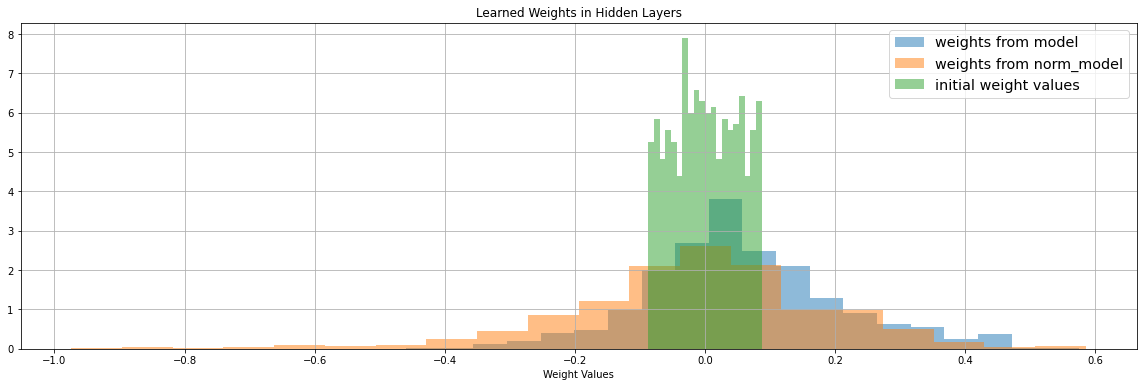

In [19]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

# by setting density=True, we are transforming our plots into probability distributions 
plt.hist(weights.T[0], bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm.T[0], bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="initial weight values", density=True);
plt.legend(fontsize="x-large");

### Observations

Your plot should have 3 distributions

- weights from model trained on non-normalized data
- weights from model trained on normalized data
- initial weight values sampled from a Glorot Uniform distributions 

Use the plot to answer the following questions.

**Comparing the initial weights with weights_from_model, what was the effect of not using normalized data?**

The weights are less uniformly distributed over a smaller range of values.

**Comparing the initial weights with weights_from_norm_model, what was the effect of using normalized data?**

The weights are more uniformly distributed over a larger ranger of values 

**Using your understand of how Gradient Descent works, why do you think that the distributions between weights_from_model and weights_from_norm_model look so different?**

The weights are adjusted based on the gradient value wrt to weight per input line. This gradient value is proportional to the data value i.e. the bigger the data value, the bigger the adjustment to the weight and therefore most of the weight changes will be in the lines with the larger values. Normalizing the input data results in the weight adjustment being spread out more uniformly among the input lines.

----

# Additional Experiments

The previous experiment demonstrated the importance of normalizing our data in order to maximize model accuracy. In the next few experiments, we are going to explore the effect that certain values for Batch Size, Learning Rate, and different Optimizers have on model accuracy. 

Using our **create_model** model building function, conduct the following experiments. 

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [20]:
# Clear any logs from previous runs
!rm -rf ./logs_batch_size/

def train_with_batch_size(batch_size):
    now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    logdir = os.path.join("logs_batch_size", f"BatchSize({batch_size})-{now}")
    tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

    norm_model = create_model(lr=.001, opt="adam")
    norm_model.fit(X_train_scaled, y_train, 
              validation_data=(X_test_scaled, y_test),
              epochs=10, 
              batch_size=batch_size, 
              verbose=0, 
              callbacks=[tensorboard])
    
for batch_size in [16, 32, 64, 128, 256]:
    print(f'Training with batch_size={batch_size}')
    train_with_batch_size(batch_size)
    
print('Done with experiments')

Training with batch_size=16
Training with batch_size=32
Training with batch_size=64
Training with batch_size=128
Training with batch_size=256
Done with experiments


In [21]:
%tensorboard --logdir logs_batch_size --port=8002 --host=localhost

Batch sizes of 32 and 64 have similar validation_accuracy performance but a batch size of 32 provides better training_accuracy as well, so we chose 32 as the optimum batch size.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [22]:
# Clear any logs from previous runs
!rm -rf ./logs_learning_rate/

def train_with_learning_rate(learning_rate):
    now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    logdir = os.path.join("logs_learning_rate", f"LearningRate({learning_rate})-{now}")
    tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

    norm_model = create_model(lr=learning_rate, opt="adam")
    norm_model.fit(X_train_scaled, y_train, 
              validation_data=(X_test_scaled, y_test),
              epochs=10, 
              batch_size=32, 
              verbose=0, 
              callbacks=[tensorboard])
    
for learning_rate in [1, 0.1, 0.01, 0.001, 0.0001]:
    print(f'Training with learning_rate={learning_rate}')
    train_with_learning_rate(learning_rate)
    
print('Done with experiments')

Training with learning_rate=1
Training with learning_rate=0.1
Training with learning_rate=0.01
Training with learning_rate=0.001
Training with learning_rate=0.0001
Done with experiments


In [39]:
%tensorboard --logdir logs_learning_rate --port=8003 --host=localhost

Reusing TensorBoard on port 8003 (pid 23295), started 0:00:15 ago. (Use '!kill 23295' to kill it.)

A learning rate of 0.001 provides the best performance

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [24]:
# Clear any logs from previous runs
!rm -rf ./logs_optimizer/

def train_with_optimizer(optimizer):
    now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    logdir = os.path.join("logs_optimizer", f"Optimizer({optimizer})-{now}")
    tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

    norm_model = create_model(lr=0.001, opt=optimizer)
    norm_model.fit(X_train_scaled, y_train, 
              validation_data=(X_test_scaled, y_test),
              epochs=10, 
              batch_size=32, 
              verbose=0, 
              callbacks=[tensorboard])
    



for optimizer in ["adam", "sgd", "adamax", "adagrad", "adadelta"]:
    print(f'Training with optimizer={optimizer}')
    train_with_optimizer(optimizer)
    
print('Done with experiments')

Training with optimizer=adam
Training with optimizer=sgd
Training with optimizer=adamax
Training with optimizer=adagrad
Training with optimizer=adadelta
Done with experiments


In [34]:
%tensorboard --logdir logs_optimizer --port=8004 --host=localhost

Reusing TensorBoard on port 8004 (pid 23301), started 0:00:00 ago. (Use '!kill 23301' to kill it.)

Adam and Adamax are the best performing optimizers with Adam winning by a nose.

In [26]:
# Clear any logs from previous runs
!rm -rf ./logs_optimizer_learning_rate/

def train_with_optimizer_learning_rate(optimizer, learning_rate):
    now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    logdir = os.path.join("logs_optimizer_learning_rate", f"OptimizerLearningRate({optimizer}:{learning_rate})-{now}")
    tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

    norm_model = create_model(lr=learning_rate, opt=optimizer)
    norm_model.fit(X_train_scaled, y_train, 
              validation_data=(X_test_scaled, y_test),
              epochs=10, 
              batch_size=32, 
              verbose=0, 
              callbacks=[tensorboard])
    



for optimizer in ["adam", "sgd", "adamax", "adagrad", "adadelta"]:
    for learning_rate in [1, 0.1, 0.01, 0.001, 0.0001]:
        print(f'Training with optimizer={optimizer} learning_rate={learning_rate}')
        train_with_optimizer_learning_rate(optimizer, learning_rate)

print('Done with experiments')

Training with optimizer=adam learning_rate=1
Training with optimizer=adam learning_rate=0.1
Training with optimizer=adam learning_rate=0.01
Training with optimizer=adam learning_rate=0.001
Training with optimizer=adam learning_rate=0.0001
Training with optimizer=sgd learning_rate=1
Training with optimizer=sgd learning_rate=0.1
Training with optimizer=sgd learning_rate=0.01
Training with optimizer=sgd learning_rate=0.001
Training with optimizer=sgd learning_rate=0.0001
Training with optimizer=adamax learning_rate=1
Training with optimizer=adamax learning_rate=0.1
Training with optimizer=adamax learning_rate=0.01
Training with optimizer=adamax learning_rate=0.001
Training with optimizer=adamax learning_rate=0.0001
Training with optimizer=adagrad learning_rate=1
Training with optimizer=adagrad learning_rate=0.1
Training with optimizer=adagrad learning_rate=0.01
Training with optimizer=adagrad learning_rate=0.001
Training with optimizer=adagrad learning_rate=0.0001
Training with optimizer=

In [41]:
%tensorboard --logdir logs_optimizer_learning_rate --port=8005 --host=localhost

The best performers are Adam(0.001), SGD(1) and Adamax(0.01) 

------

## Stretch Goals: 

- On the learning rate experiments, implement [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Review the math of Gradient Descent. 